A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the files in ~/Data/us_dot/otp. What do they contain, in both technical and functional terms? (Use any tool you want)

In [3]:
path_to_zips = '../data/us_dot/otp/'

In [4]:
! ls {path_to_zips} 

On_Time_On_Time_Performance_2015_1.zip On_Time_On_Time_Performance_2015_5.zip
On_Time_On_Time_Performance_2015_2.zip On_Time_On_Time_Performance_2015_6.zip
On_Time_On_Time_Performance_2015_3.zip On_Time_On_Time_Performance_2015_7.zip
On_Time_On_Time_Performance_2015_4.zip On_Time_On_Time_Performance_2015_8.zip


For this example, we are going to begin using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that we can substitute python variables into the shell command. We do that by surrounding the name of the variable with curly braces ({}). That's what we are going to do with the `path_to_files` variable

### Check what the files contain

In [5]:
! unzip -l {path_to_zips}On_Time_On_Time_Performance_2015_1.zip

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
211633432  04-16-2015 20:02   On_Time_On_Time_Performance_2015_1.csv
    12054  04-16-2015 20:02   readme.html
---------                     -------
211645486                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell

Remember, since the zip file contains several compressed files, we need to specify which one we want.

In [6]:
! unzip -o {path_to_zips}On_Time_On_Time_Performance_2015_1.zip readme.html -d $(pwd)

Archive:  ../data/us_dot/otp/On_Time_On_Time_Performance_2015_1.zip
  inflating: /Users/aalmagro/Documents/KSchool_Jupyter/Jupyter_04/readme.html  


### Take a look at the beginning of the readme file

using the shell

In [7]:
! head readme.html 

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	On-Time Performance data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [8]:
from IPython.display import IFrame
IFrame('readme.html', width=700, height=350)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

In [9]:
# have a look at the beginning of one of the files to see what they look like

! unzip -p {path_to_zips}On_Time_On_Time_Performance_2015_1.zip | head -n 2

"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","UniqueCarrier","AirlineID","Carrier","TailNum","FlightNum","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","DivActualElapsedTime","DivArrDelay","DivDistance","Div1Airport","Div1A

Pretty unreadable, so we go for a tool designed specifically for tabular data: **pandas**

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out zipfile.ZipFile

First, open a connection to one of the files

**Note:** *remember that all the files are indeed part files of the same .zip. And the Readme file is within the .zip.*

In [10]:
import os
import zipfile

filenames = os.listdir(path_to_zips)

zip_file = zipfile.ZipFile(path_to_zips + filenames[0])

In [15]:
print(filenames)

['On_Time_On_Time_Performance_2015_1.zip', 'On_Time_On_Time_Performance_2015_2.zip', 'On_Time_On_Time_Performance_2015_3.zip', 'On_Time_On_Time_Performance_2015_4.zip', 'On_Time_On_Time_Performance_2015_5.zip', 'On_Time_On_Time_Performance_2015_6.zip', 'On_Time_On_Time_Performance_2015_7.zip', 'On_Time_On_Time_Performance_2015_8.zip']


zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [13]:
csv, readme = zip_file.filelist
print(csv)

csv_file = zip_file.open(csv.filename)

<ZipInfo filename='On_Time_On_Time_Performance_2015_1.csv' compress_type=deflate filemode='-rw-r--r--' file_size=211633432 compress_size=23058756>


Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [19]:
# We reopen the file because we have already consumed the header line.
import pandas as pd

csv_file = zip_file.open(csv.filename)
df = pd.read_csv(csv_file)

csv_file.close()
zip_file.close()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (77,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [20]:
df.head()

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
0  2015        1      1           1          4  2015-01-01            AA   
1  2015        1      1           2          5  2015-01-02            AA   
2  2015        1      1           3          6  2015-01-03            AA   
3  2015        1      1           4          7  2015-01-04            AA   
4  2015        1      1           5          1  2015-01-05            AA   

   AirlineID Carrier TailNum      ...       Div4TailNum  Div5Airport  \
0      19805      AA  N787AA      ...               NaN          NaN   
1      19805      AA  N795AA      ...               NaN          NaN   
2      19805      AA  N788AA      ...               NaN          NaN   
3      19805      AA  N791AA      ...               NaN          NaN   
4      19805      AA  N783AA      ...               NaN          NaN   

   Div5AirportID  Div5AirportSeqID Div5WheelsOn Div5TotalGTime  \
0            NaN               NaN          NaN            NaN   
1            NaN               NaN          NaN            NaN   
2            NaN               NaN          NaN            NaN   
3            NaN               NaN          NaN            NaN   
4            NaN               NaN          NaN            NaN   

  Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0              NaN            NaN         NaN           NaN  
1              NaN            NaN         NaN           NaN  
2              NaN            NaN         NaN           NaN  
3              NaN            NaN         NaN           NaN  
4              NaN            NaN         NaN           NaN  

[5 rows x 110 columns]

In [21]:
df.shape

(469968, 110)

In [22]:
print(df.size)
df.size == df.shape[0] * df.shape[1]

51696480


True

In [23]:
df.dtypes

Year                    int64
Quarter                 int64
Month                   int64
DayofMonth              int64
DayOfWeek               int64
FlightDate             object
UniqueCarrier          object
AirlineID               int64
Carrier                object
TailNum                object
FlightNum               int64
OriginAirportID         int64
OriginAirportSeqID      int64
OriginCityMarketID      int64
Origin                 object
OriginCityName         object
OriginState            object
OriginStateFips         int64
OriginStateName        object
OriginWac               int64
DestAirportID           int64
DestAirportSeqID        int64
DestCityMarketID        int64
Dest                   object
DestCityName           object
DestState              object
DestStateFips           int64
DestStateName          object
DestWac                 int64
CRSDepTime              int64
                       ...   
Div2WheelsOn          float64
Div2TotalGTime        float64
Div2Longes

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [24]:
non_null_counts = df.count()

non_null_counts[non_null_counts < 1000]

DivReachedDest          973
DivActualElapsedTime    684
DivArrDelay             684
DivDistance             971
Div1WheelsOff           704
Div1TailNum             704
Div2Airport              27
Div2AirportID            27
Div2AirportSeqID         27
Div2WheelsOn             27
Div2TotalGTime           27
Div2LongestGTime         27
Div2WheelsOff             9
Div2TailNum               9
Div3Airport               2
Div3AirportID             2
Div3AirportSeqID          2
Div3WheelsOn              2
Div3TotalGTime            2
Div3LongestGTime          2
Div3WheelsOff             0
Div3TailNum               0
Div4Airport               0
Div4AirportID             0
Div4AirportSeqID          0
Div4WheelsOn              0
Div4TotalGTime            0
Div4LongestGTime          0
Div4WheelsOff             0
Div4TailNum               0
Div5Airport               0
Div5AirportID             0
Div5AirportSeqID          0
Div5WheelsOn              0
Div5TotalGTime            0
Div5LongestGTime    

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [25]:
# Dropping inplace leads to confusion. Confusion leads to fear. 
# Fear leads to anger. Anger leads to hate. Hate leads to suffering.
df2 = df.drop(df.columns[non_null_counts < 1000], axis=1)

In [26]:
df2.shape

(469968, 71)

In [27]:
# Another way to do it

df.dropna(axis=1, thresh=1000).shape == df2.shape

True

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [28]:
df[df.columns[df.columns.str.contains('Origin')]].sample(5)

OriginAirportID  OriginAirportSeqID  OriginCityMarketID Origin  \
219549            13204             1320402               31454    MCO   
150075            10821             1082103               30852    BWI   
380887            11193             1119302               33105    CVG   
370295            13487             1348702               31650    MSP   
279419            13930             1393003               30977    ORD   

         OriginCityName OriginState  OriginStateFips OriginStateName  \
219549      Orlando, FL          FL               12         Florida   
150075    Baltimore, MD          MD               24        Maryland   
380887   Cincinnati, OH          KY               21        Kentucky   
370295  Minneapolis, MN          MN               27       Minnesota   
279419      Chicago, IL          IL               17        Illinois   

        OriginWac  
219549         33  
150075         35  
380887         52  
370295         63  
279419         41

So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

In [53]:
df2 = df[['FlightDate', 'DayOfWeek', 'Carrier', 'TailNum', 'FlightNum', 'Origin', 
         'OriginCityName', 'OriginStateName', 'Dest', 'DestCityName', 'DestStateName',
         'DepTime', 'DepDelay', 'AirTime', 'Distance']]
df.sample(5)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate UniqueCarrier  \
44085   2015        1      1          10          6  2015-01-10            AS   
393350  2015        1      1          27          2  2015-01-27            EV   
160927  2015        1      1          10          6  2015-01-10            WN   
462556  2015        1      1           7          3  2015-01-07            EV   
212991  2015        1      1          27          2  2015-01-27            WN   

        AirlineID Carrier TailNum      ...       Div4TailNum  Div5Airport  \
44085       19930      AS  N464AS      ...               NaN          NaN   
393350      20366      EV  N31131      ...               NaN          NaN   
160927      19393      WN  N7742B      ...               NaN          NaN   
462556      20366      EV  N11548      ...               NaN          NaN   
212991      19393      WN  N8611F      ...               NaN          NaN   

        Div5AirportID  Div5AirportSeqID Div5WheelsOn Div5TotalGTime  \
44085             NaN               NaN          NaN            NaN   
393350            NaN               NaN          NaN            NaN   
160927            NaN               NaN          NaN            NaN   
462556            NaN               NaN          NaN            NaN   
212991            NaN               NaN          NaN            NaN   

       Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
44085               NaN            NaN         NaN           NaN  
393350              NaN            NaN         NaN           NaN  
160927              NaN            NaN         NaN           NaN  
462556              NaN            NaN         NaN           NaN  
212991              NaN            NaN         NaN           NaN  

[5 rows x 110 columns]

## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [54]:
df2.dtypes

FlightDate          object
DayOfWeek            int64
Carrier             object
TailNum             object
FlightNum            int64
Origin              object
OriginCityName      object
OriginStateName     object
Dest                object
DestCityName        object
DestStateName       object
DepTime            float64
DepDelay           float64
AirTime            float64
Distance           float64
dtype: object

Pandas interpreted the Deptime column as ints and the FlighDate column as strings. We want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes.

First step:

#### Exercise

Define a function that will parse our int hours into a reasonable format ("HH:MM"). It should take only one int hour and return the appropriate representation.

In [50]:
# We'll need to take an int and return a string of the appropriate format
import numpy as np
def deptime_to_string(num):
    if num!=num:#If np.nan better handle this
        num =0.0;

    hour = int(num / 100) % 24 # There are 24s in the data, which datetime doesn't like
    minute = int(num % 100)
    

    return '%02d:%02d' % (hour, minute)

deptime_to_string(2423.0)
#deptime_to_string(np.nan)

'00:23'

Now, we can use that function to build datetime strings that we will then pass to pd.to_datetime, with a format we will specify. Let's do that

Hint: Check out [pd.to_datetime's documentatoin](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) for info on the acceptable format.

#### Exercise

Overwrite the 'DepTime' column with its version in the proper format

Hint: Before overwriting your column in the dataframe, make sure that everything works by assigning the modified column to a Series variable (this takes care of not messing up with the index!).

In [62]:
#series = df2['DepTime'].apply(deptime_to_string)
series = df2['DepTime'].dropna().apply(deptime_to_string)
series.head()

0    08:55
1    08:50
2    08:53
3    08:53
4    08:53
Name: DepTime, dtype: object

In [63]:
df2['DepTimeStr'] = series

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
# What happened to the nas? They are still nas, because our 
# Series didn't contain them. Therefore, when we put the 
# Series back into the Dataframe, those cells stayed empty.
df2['DepTimeStr'].count()

458311

#### Exercise

Now, create a DepDateTime with the proper type using `pd.to_datetime`

In [65]:
# This is the format pd.to_datetime needs:

ts = pd.to_datetime('2015-01-15 08:30')
ts

Timestamp('2015-01-15 08:30:00')

In [66]:
departure_datetimes = pd.to_datetime(df2['FlightDate'] + ' ' + df2['DepTimeStr'])
df2['DepDateTime'] = departure_datetimes

# Drop the now-redundant columns
df2 = df2.drop(['FlightDate', 'DepTime', 'DepTimeStr'], axis=1)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [67]:
df2.sample(5)

DayOfWeek Carrier TailNum  FlightNum Origin     OriginCityName  \
126605          1      VX  N635VA         90    SFO  San Francisco, CA   
73221           4      DL  N324NB        860    SNA      Santa Ana, CA   
207743          7      WN  N428WN       1958    LGA       New York, NY   
61336           3      B6  N267JB        518    JFK       New York, NY   
179271          4      WN  N8602F        793    MCI    Kansas City, MO   

       OriginStateName Dest     DestCityName  DestStateName  DepDelay  \
126605      California  IAD   Washington, DC       Virginia      -9.0   
73221       California  MSP  Minneapolis, MN      Minnesota      -3.0   
207743        New York  MDW      Chicago, IL       Illinois      40.0   
61336         New York  BOS       Boston, MA  Massachusetts       NaN   
179271        Missouri  MDW      Chicago, IL       Illinois      -2.0   

        AirTime  Distance         DepDateTime  
126605    287.0    2419.0 2015-01-26 13:56:00  
73221     188.0    1522.0 2015-01-01 06:42:00  
207743    113.0     725.0 2015-01-25 16:35:00  
61336       NaN     187.0                 NaT  
179271     62.0     405.0 2015-01-15 15:53:00

### Inspect the types, see if everything is in order

In [68]:
df2.dtypes

DayOfWeek                   int64
Carrier                    object
TailNum                    object
FlightNum                   int64
Origin                     object
OriginCityName             object
OriginStateName            object
Dest                       object
DestCityName               object
DestStateName              object
DepDelay                  float64
AirTime                   float64
Distance                  float64
DepDateTime        datetime64[ns]
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays. 

How would you find the 5 maximum delays?

In [69]:
df2.sort_values(by='DepDelay', ascending=False).head()

DayOfWeek Carrier TailNum  FlightNum Origin    OriginCityName  \
21523           5      AA  N598AA       1322    BHM    Birmingham, AL   
11524           7      AA  N5DGAA        224    LAS     Las Vegas, NV   
18198           2      AA  N586AA       1242    FAT        Fresno, CA   
108152          3      AA  N4XNAA       2385    JAX  Jacksonville, FL   
26001           7      AA  N469AA       1595    AUS        Austin, TX   

       OriginStateName Dest           DestCityName DestStateName  DepDelay  \
21523          Alabama  DFW  Dallas/Fort Worth, TX         Texas    1988.0   
11524           Nevada  LAX        Los Angeles, CA    California    1604.0   
18198       California  DFW  Dallas/Fort Worth, TX         Texas    1551.0   
108152         Florida  DFW  Dallas/Fort Worth, TX         Texas    1457.0   
26001            Texas  DFW  Dallas/Fort Worth, TX         Texas    1450.0   

        AirTime  Distance         DepDateTime  
21523      99.0     597.0 2015-01-23 16:08:00  
11524      42.0     236.0 2015-01-18 14:14:00  
18198     155.0    1313.0 2015-01-27 08:50:00  
108152    144.0     918.0 2015-01-21 12:40:00  
26001      37.0     190.0 2015-01-11 07:00:00

#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [70]:
df2['DepDelay'].describe()

count    458311.000000
mean          9.759471
std          36.636491
min         -48.000000
25%          -5.000000
50%          -2.000000
75%           9.000000
max        1988.000000
Name: DepDelay, dtype: float64

Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [71]:
df2.corr()

DayOfWeek  FlightNum  DepDelay   AirTime  Distance
DayOfWeek   1.000000   0.016484  0.017254  0.027161  0.021530
FlightNum   0.016484   1.000000  0.024760 -0.335150 -0.349912
DepDelay    0.017254   0.024760  1.000000  0.013282  0.013871
AirTime     0.027161  -0.335150  0.013282  1.000000  0.981376
Distance    0.021530  -0.349912  0.013871  0.981376  1.000000

#### Exercise

What is the origin that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [77]:
#grouped_by_plane = df2.groupby('TailNum')
grouped_by_plane = df2.groupby('Origin')
type(grouped_by_plane)

pandas.core.groupby.DataFrameGroupBy

In [78]:
grouped_by_plane['DepDelay'].mean().sort_values(ascending=False).head(10)

Origin
DVL    35.627907
JMS    34.322581
IMT    32.381818
OTH    30.375000
CEC    28.881356
TTN    26.942982
SCE    26.492063
ILG    26.461538
APN    25.653061
ACV    25.088435
Name: DepDelay, dtype: float64

But the mean can be only meaningful if we had enough samples. Lets check that! We can aggregate *mean* and *count* at the same time.

In [83]:
#delays_by_plane = grouped_by_plane['DepDelay'].agg(['mean', 'count'])
delays_by_origin = grouped_by_plane['DepDelay'].agg(['mean', 'count'])

In [84]:
#delays_by_plane.sort_values('mean', ascending=False)
delays_by_origin.sort_values('mean', ascending=False)

mean  count
Origin                  
DVL     35.627907     43
JMS     34.322581     62
IMT     32.381818     55
OTH     30.375000     16
CEC     28.881356     59
TTN     26.942982    228
SCE     26.492063     63
ILG     26.461538     26
APN     25.653061     49
ACV     25.088435    147
BPT     24.595506     89
ABR     24.500000     60
PIH     23.633333     60
EAU     22.836066     61
GUC     22.095890     73
ESC     21.666667     48
ASE     20.867797    590
TVC     20.690217    184
ROW     20.654321     81
ORD     19.962051  22425
JAC     18.787172    343
STC     18.509091     55
SBN     18.491892    370
BIS     18.302632    304
FAT     18.125547    685
COS     17.912969    586
EGE     17.760274    292
ALO     17.122449     49
BMI     16.418103    232
CID     16.200942    637
...           ...    ...
LIH      1.990576    955
SIT      1.793478     92
GPT      1.621622    333
EYW      1.584362    243
EWN      1.400000     55
BIL      1.128440    218
PPG      1.100000     10
BLI      1.032258     93
ANC      1.005111   1174
FAI      0.896104    154
HRL      0.888889    279
LRD      0.465347    202
DAB      0.458333    120
OME      0.103448     58
HOB      0.069767     43
CLD     -0.405000    200
HLN     -0.682243    107
BRD     -1.576923     52
CDC     -2.056604     53
PSE     -2.069444     72
BET     -2.312500     80
TWF     -5.517857     56
LWS     -6.358491     53
ADK     -6.666667      9
BTM     -7.152542     59
YAK     -8.016949     59
CDV     -8.333333     60
ADQ     -8.827586     29
EKO     -8.852459     61
CNY     -8.888889     54

[312 rows x 2 columns]

Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [91]:
consistently_delayed = delays_by_origin[delays_by_origin['count'] > 14]
highly_delayed = consistently_delayed.sort_values('mean', ascending=False).head(100)

# What companies run the rank 5/10 most delayed?
df2.join(highly_delayed.head(5), on='Origin', how='inner')['Carrier'].unique()

array(['OO'], dtype=object)

#### Exercise: 

Show cities by descending number of airports

In [97]:
airports_by_city = df2.groupby('OriginCityName')['Origin'].unique()
#We have a list of Airport code for each city now.
airports_by_city.map(lambda x: len(x)).sort_values(ascending=False).head()

OriginCityName
Houston, TX         2
Chicago, IL         2
New York, NY        2
Washington, DC      2
Fayetteville, NC    1
Name: Origin, dtype: int64

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot with matplotlib. Check the documentation

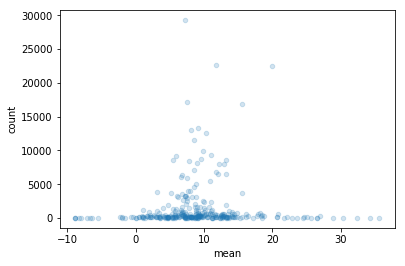

In [101]:
import matplotlib.pyplot as plt 
%matplotlib inline

ax = delays_by_origin.plot.scatter('mean', 'count', alpha=.2)
#ax.set_xlim(-20,240)
#ax.set_ylim(-10,240)

#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

Text(0.5,1,'Number of flights per delay bin')

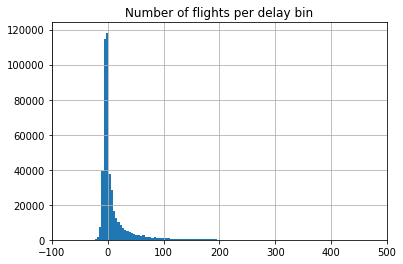

In [114]:
# Little trick: Just by importing seaborn, it will change 
# matplotlib defaults and make your graphs much prettier.!!

import seaborn as sns

ax = df['DepDelay'].hist(bins=500)
ax.set_xlim(-100, 500)

plt.title('Number of flights per delay bin')

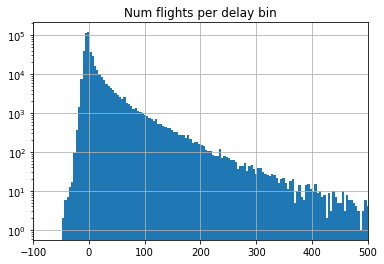

In [113]:
# We can make any axis logarithmic in order to see better a very unequal distribution

ax = df['DepDelay'].hist(bins=500)
ax.set_xlim(-100, 500)
plt.title('Num flights per delay bin')

plt.yscale('log')


### Another question:

how do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

In [42]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_xticks=True, autorange=False, zorder=None, hold=None, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will pr

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [115]:
# Now, we can iterate over the groups and extract the delays. 
# We keep them in two different vectors because that is what boxplot wants

df2['DepHour'] =  df2['DepDateTime'].map(lambda x: x.hour)

by_hour = df2.groupby('DepHour')

hours = []
groups = []

for h, g in by_hour:
    hours.append("%02d" % h)
    groups.append(g['DepDelay'])

In [44]:
# We have create a groupby object. That object behaves like a list.
# Each element of that list is a (key, dataframe) tuple.
# You can think of the key as the group's name. The dataframe
# contains all the rows in the original dataframe that correspond 
# to that key: Here, group '0.0' contains all rows from flights 
# that departed on hour 0.

print(type(by_hour))
print(list(by_hour))
print(list(by_hour)[0], list(by_hour)[0][1].shape)

<class 'pandas.core.groupby.DataFrameGroupBy'>
[(0.0,         DayOfWeek Carrier TailNum  FlightNum Origin     OriginCityName  \
2290            1      AA  N3EEAA         91    ORD        Chicago, IL   
4323            4      AA  N3EXAA        234    MIA          Miami, FL   
4922            3      AA  N3HRAA        219    LAX    Los Angeles, CA   
4923            4      AA  N3HUAA        219    LAX    Los Angeles, CA   
4924            5      AA  N3GWAA        219    LAX    Los Angeles, CA   
4931            5      AA  N3AJAA        219    LAX    Los Angeles, CA   
4937            4      AA  N3LEAA        219    LAX    Los Angeles, CA   
4940            7      AA  N3CDAA        219    LAX    Los Angeles, CA   
4943            3      AA  N3HAAA        219    LAX    Los Angeles, CA   
5639            1      AA  N3EPAA        272    SFO  San Francisco, CA   
5645            7      AA  N3BJAA        272    SFO  San Francisco, CA   
5650            5      AA  N3EFAA        272    SFO  San F

### Everything looks ok! let's plot this thing!

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


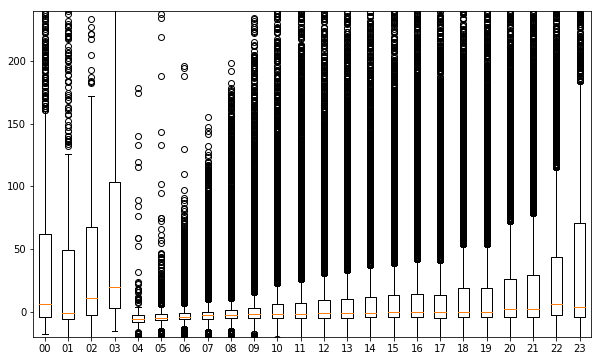

In [116]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_ylim(-20, 240)

bp = plt.boxplot(groups)

labels = plt.setp(ax1, xticklabels=hours)